In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


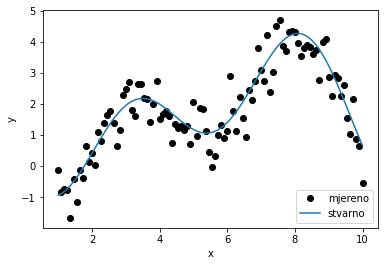

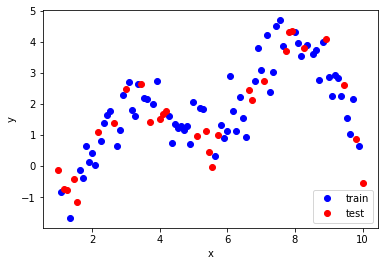

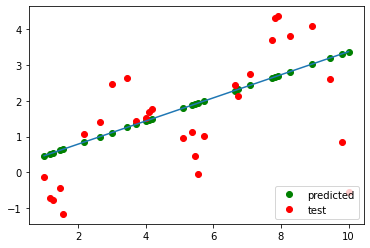

In [6]:
#zadatak 1

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


In [25]:
#zadatak 2

x_train = xtrain
x_train = np.insert(x_train,0,1,axis=1)

def getThetaML(x,y):
    return (np.linalg.inv(np.matrix.transpose(x)@x))@np.matrix.transpose(x)@y
thetaML = getThetaML(x_train,ytrain)
print('Theta0 = ',thetaML[0], '\nTheta1 = ', thetaML[1])
print('y_hat_ML = ', thetaML[0][0], ' + ', thetaML[1][0], 'x')

Theta0 =  [-1.62281251e+15] 
Theta1 =  [1.62281251e+15]
y_hat_ML =  -1622812507203881.8  +  1622812507202404.5 x


In [32]:
#zadatak 3.
N_STEPS = 1000
def gradijentniSpust(theta, N_STEPS, x, y, alpha):
    for i in range (N_STEPS):
        for j in range (len(theta)):
            theta[j] = theta[j] - alpha*getDeltaJ(theta,x,y,j)
    return theta
    
def getDeltaJ(theta,x,y,j):
    J=0
    for i in range (len(x)):
        J+=(jednPravca(theta, x[i]) - y[i])*x[i,j]
    J /= len(x)
    return J

def jednPravca(theta,x):
    return theta[0] + theta[1]*x[1]

theta_start = [0,0]
alpha = 0.045
theta_gradient = gradijentniSpust(theta_start,N_STEPS,x_train,ytrain,alpha)
print('Theta0 = ', theta_gradient[0][0], ', Theta1= ', theta_gradient[1][0])
print('y_hat_gradient =', theta_gradient[0][0], '+',theta_gradient[1][0],'x')


Theta0 =  1.1336229117865664 , Theta1=  1.0826098807561721
y_hat_gradient = 1.1336229117865664 + 1.0826098807561721 x


[0.686262720339181, 0.31157034291242314, 1.2745083887453057]


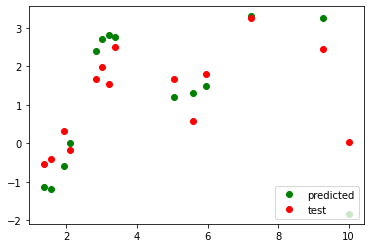

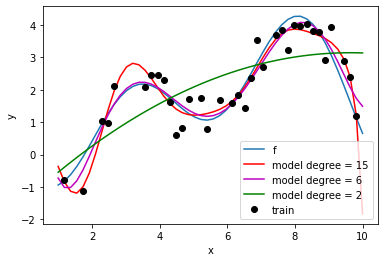

In [17]:
#zadaci 4 i 5

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
poly2 = PolynomialFeatures(degree=6)
poly3 = PolynomialFeatures(degree=2)
xnew = poly.fit_transform(x)
xnew2 = poly2.fit_transform(x)
xnew3 = poly3.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
xtrain2 = xnew2[indeksi_train,]
xtrain3 = xnew3[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
xtest2= xnew2[indeksi_test,]
xtest3 = xnew3[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain)
linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain)
ytest_p = linearModel.predict(xtest)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)
MSE_test = [mean_squared_error(ytest, ytest_p),mean_squared_error(ytest,ytest_p2), mean_squared_error(ytest,ytest_p3)]
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')

plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model degree = 15')
plt.plot(x,linearModel2.predict(xnew2),'m-',label='model degree = 6')
plt.plot(x,linearModel3.predict(xnew3),'g-',label='model degree = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

print(MSE_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[[ 0.00000000e+00 -6.91703156e-02 -9.64029713e-02 -2.54846512e-02
   1.25873620e-01  1.54255368e-01 -9.01383490e-02 -1.40031650e-02
   1.85766473e-02 -4.78368236e-03  4.14727116e-04  3.62659755e-05
  -1.19678899e-05  1.18210694e-06 -5.51878796e-08  1.03127934e-09]] Ridge()


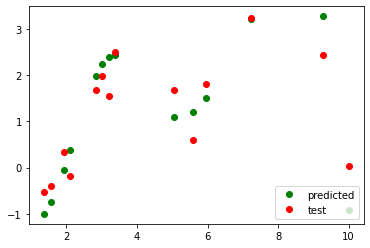

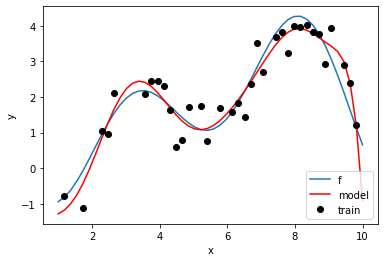

In [19]:
#Zadatak 6


def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.Ridge()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

print(linearModel.coef_, linearModel)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.62104e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.07235e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.70983e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.17388e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

MSE = 16.362851414503112


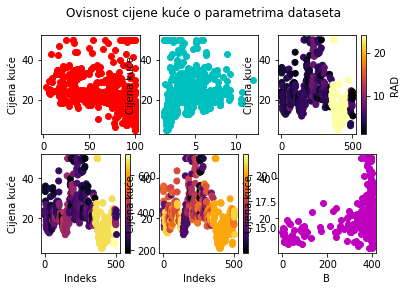

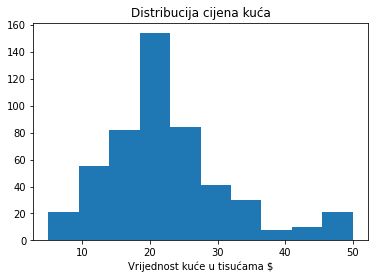

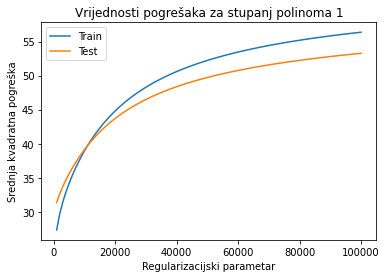

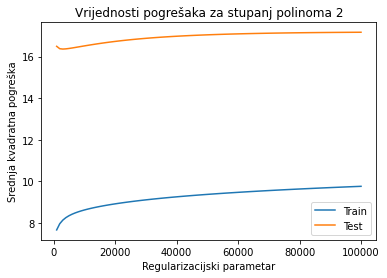

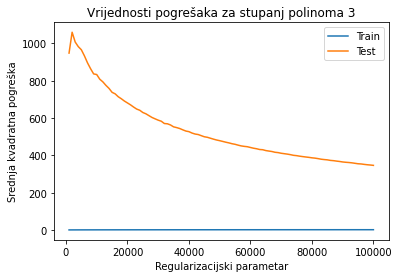

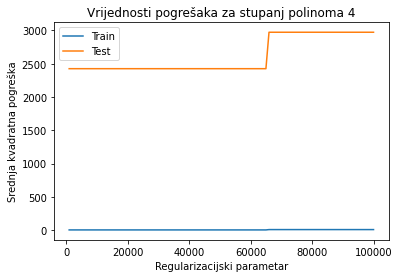

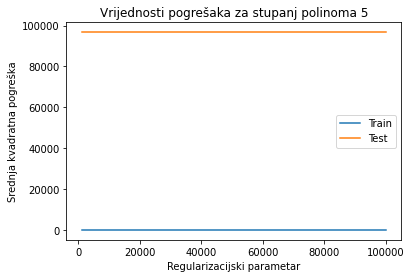

In [33]:
#zadatak 7

 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from itertools import cycle
 
boston = load_boston()
x = boston.data
y = boston.target
 
print(boston.feature_names)
 
cycol = cycle('bgrcmk')
 
plt.figure()
plt.suptitle('Ovisnost cijene kuće o parametrima dataseta')
 
for i in range(6):
    plt.subplot(2, 3, i+1)
    if(i==3):
        plt.scatter(np.where(x[:, i]==0), y[x[:, i]==0], c='r', label='Nije uz rijeku')
        plt.scatter(np.where(x[:, i]==1), y[x[:, i]==1], c='g', label='Uz rijeku')
        plt.legend()
    elif i in [1,2,4]:
        plt.scatter(range(len(y)), y, c = x[:, i], cmap = 'inferno')
        plt.colorbar().set_label(boston.feature_names[i])
        plt.xlabel('Indeks')
    else:
        plt.scatter(x[:,i], y, c=next(cycol))
        plt.xlabel(boston.feature_names[i])
    plt.ylabel('Cijena kuće')
 
plt.figure() 
plt.suptitle('Ovisnost cijene kuće o parametrima dataseta')
 
for i in range(6, 12):
    plt.subplot(2, 3, i+1-6)
    if i in [8,9,10]:
        plt.scatter(range(len(y)), y, c = x[:, i], cmap = 'inferno')
        plt.colorbar().set_label(boston.feature_names[i])
        plt.xlabel('Indeks')
    else:
        plt.scatter(x[:,i], y, c=next(cycol))
        plt.xlabel(boston.feature_names[i])
    plt.ylabel('Cijena kuće')
 
plt.figure()
plt.hist(y, bins=10)
plt.title('Distribucija cijena kuća')
plt.xlabel('Vrijednost kuće u tisućama $')
 
lambdas = range(1000, 100001, 1000)
 
#pronalazak optimalnog stupnja polinoma i regularizacijskog parametra
for i in range(1, 6):
    MSE_train = []
    MSE_test = []
 
    poly = PolynomialFeatures(degree=i)
    x_t = poly.fit_transform(x)
 
    np.random.seed(12)
    indeksi = np.random.permutation(len(x_t))
    indeksi_train = indeksi[0:int(np.floor(0.7*len(x_t)))]
    indeksi_test = indeksi[int(np.floor(0.7*len(x_t)))+1:len(x_t)] 
 
    xtrain = x_t[indeksi_train]
    ytrain = y[indeksi_train]
 
    xtest = x_t[indeksi_test]
    ytest = y[indeksi_test] 
 
    for lmbd in lambdas:
        linearModel = lm.Ridge(lmbd)
        linearModel.fit(xtrain,ytrain)
 
        ytrain_p = linearModel.predict(xtrain)
        MSE_train.append(mean_squared_error(ytrain, ytrain_p))
 
        ytest_p = linearModel.predict(xtest)
        MSE_test.append(mean_squared_error(ytest, ytest_p))
 
    plt.figure()
    plt.xlabel('Regularizacijski parametar')
    plt.ylabel('Srednja kvadratna pogreška')
    plt.plot(lambdas, MSE_train, label = 'Train')
    plt.plot(lambdas, MSE_test, label = 'Test')
    plt.title('Vrijednosti pogrešaka za stupanj polinoma ' + str(i))
    plt.legend()
 
#treniranje i prikaz rezultata za stupanj polinoma 2 i vrijednost regularizacijskog parametra 3000
poly = PolynomialFeatures(degree=2)
x_t = poly.fit_transform(x)
 
np.random.seed(12)
indeksi = np.random.permutation(len(x_t))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x_t)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x_t)))+1:len(x_t)] 
 
xtrain = x_t[indeksi_train]
ytrain = y[indeksi_train]
 
xtest = x_t[indeksi_test]
ytest = y[indeksi_test] 
 
linearModel = lm.Ridge(3000)
linearModel.fit(xtrain,ytrain)
 
ytrain_p = linearModel.predict(xtrain)
 
ytest_p = linearModel.predict(xtest)
print('MSE = ' + str(mean_squared_error(ytest, ytest_p)))
 
plt.figure()
plt.ylim((0,60))
plt.scatter(range(len(ytest)), ytest[ytest.argsort()], c = 'g', label = 'Stvarna cijena')
plt.scatter(range(len(ytest)), ytest_p[ytest.argsort()], c = 'r', label = 'Predviđena cijena')
plt.vlines(range(len(ytest)), ytest[ytest.argsort()], ytest_p[ytest.argsort()])
plt.xlabel('Redni broj kuće')
plt.ylabel('Vrijednost kuće u tisućama $')
plt.legend()
plt.show()